In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('./bestsellers-with-categories.csv')

<h2> Primeros pasos </h2>

<p> ¿Como está mi data? </p>

In [36]:
df.info

<bound method DataFrame.info of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson  

In [37]:
df.describe

<bound method NDFrame.describe of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson

<p> ¿Cual es el Autor que más 'BS' ha publicado? </p>

In [38]:
autor = df.groupby('Author')['Author'].count()
autor.sort_values(ascending=False).head(10) 
#para no hacer muy larga la lista solo selecciono los primeros 10

Author
Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Eric Carle                             7
Bill O'Reilly                          7
Name: Author, dtype: int64

<p>Ahora sabemos que el autor que más ha publicado es Jeff Kinney, pero,¿Qué es lo que publica él? </p>

In [39]:
jeff = df.loc[df['Author'] == 'Jeff Kinney'].sort_values(ascending=True, by='Year')
jeff

,Name,Author,User Rating,Reviews,Price,Year,Genre
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
474,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,4.8,3796,12,2010,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


<p> Lo primero que notamos es que escribe libros de ficción, y además, que es toda una saga, que cada año vende un Best Seller de manera ininterrumpida </p>
<p> También vemos que la cantidad de **Reviews** tiene una tendencia positiva y su **User Rating** se mantiene </p>

<Axes: xlabel='Year'>

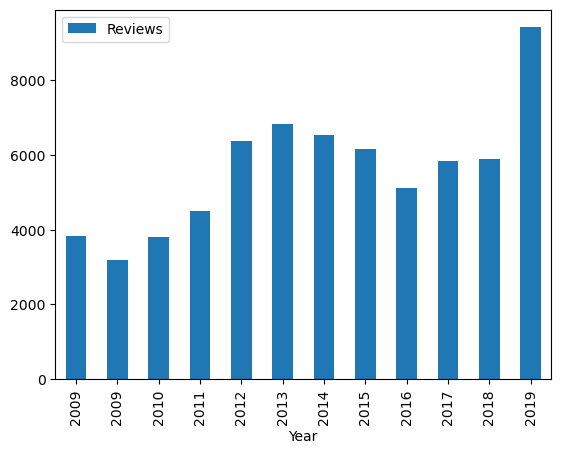

In [40]:
jeff.plot(kind='bar', x='Year', y='Reviews') #el historico de reviews de Jeff por año

<h3> Primeras preguntas </h3>

<p> ¿Acaso los autores de ficción venden más que los de no ficción?.
Primero veamos la cantidad de libros de cada genero </p>

In [41]:
gnero = df.groupby('Genre')['Genre'].count()
gnero

Genre
Fiction        240
Non Fiction    310
Name: Genre, dtype: int64

<Axes: ylabel='Genre'>

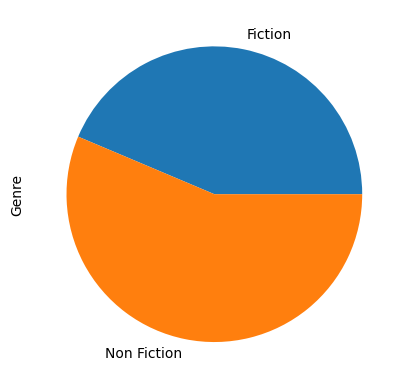

In [42]:
gnero.plot(kind='pie', x='Genre', y='gnero')

<p>Bueno, pues realmente no, la ficción no supera a la realidad. De manera general, no se vendieron más libros de ficción, como en un princpio creí

Sin embargo, me gustaría saber cuantos libros de cada genero se vendieron por año</p>

In [43]:
gnere_year = df.pivot_table(index='Year', columns='Genre', values='Name',aggfunc='count')
gnere_year

Genre,Fiction,Non Fiction
Year,,
2009,24,26
2010,20,30
2011,21,29
2012,21,29
2013,24,26
2014,29,21
2015,17,33
2016,19,31
2017,24,26


<Axes: xlabel='Year'>

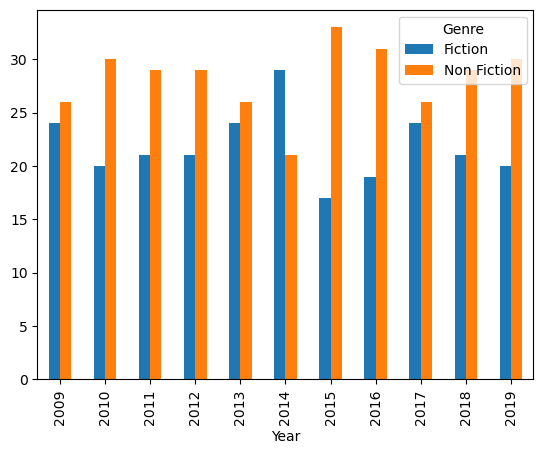

In [44]:
gnere_year.plot(kind='bar')

Es evidente que, en comparación, hay preferencia por los libros que no son del genero ficción. 

<p> ¿Pero, cual es el genero que escriben los 10 autores más vendidos? </p>

<p> Necesito una lista de los 10 autores más  vendidos, anteriormente ya la habia obtenido, pero como PandaSeries, lo que no me sirve para el filtrado, entonces el primer paso es obtener una lista a partir de allí. Desglosemos para entenderlo mejor </p>

In [45]:
b = autor.sort_values(ascending=False).head(10)#autor corresponde al conteo agrupado por 'Author' del df
b1 = b.index                                   #saco los indices
b10 = list(b1)                                 #esos indices los paso a una lista
b10

['Jeff Kinney',
 'Gary Chapman',
 'Suzanne Collins',
 'Rick Riordan',
 'American Psychological Association',
 'Gallup',
 'Dr. Seuss',
 'Rob Elliott',
 'Eric Carle',
 "Bill O'Reilly"]

<p>Ahora, filtramos el df de acuerdo a mi lista de b10 </p>

In [46]:
df_b10 = df[df['Author'].isin(b10) ]
df_b10

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
47,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2011,Fiction
48,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
...,...,...,...,...,...,...,...
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction
528,What Pet Should I Get? (Classic Seuss),Dr. Seuss,4.7,1873,14,2015,Fiction


<p> El DF obtenido anteriormente contiene unicamente los los libros publicados por los 10 autores más vendidos, a partir de ella pienso obtener el genero que escribe cada uno y la cantidad de libros de cada genero </p>

In [47]:
df_b10[['Author', 'Genre']].drop_duplicates(subset=['Author'])

,Author,Genre
42,Jeff Kinney,Fiction
46,Suzanne Collins,Fiction
196,Bill O'Reilly,Non Fiction
204,Rob Elliott,Non Fiction
245,Dr. Seuss,Fiction
264,Rick Riordan,Fiction
271,American Psychological Association,Non Fiction
304,Gallup,Non Fiction
320,Gary Chapman,Non Fiction
476,Eric Carle,Fiction


<p> Interesante, hay una distribución equitativa entre los autores que escriben ficción y los que no </p>

<p> Ahora, con este DataFrame, es muy sencillo hacer el conteo de cuantos de los libros publicados por los 10 autores mas vendidos son ficción y cuantos no </p>

In [48]:
gnero_b10 = df_b10.groupby('Genre')['Genre'].count()
gnero_b10

Genre
Fiction        50
Non Fiction    45
Name: Genre, dtype: int64

<Axes: ylabel='Genre'>

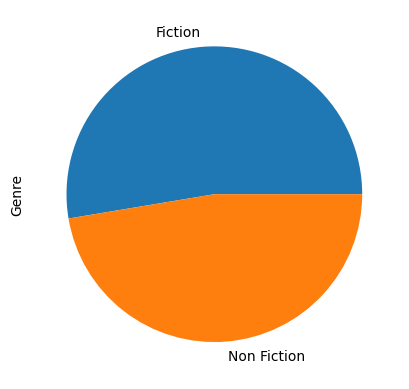

In [49]:
gnero_b10.plot(kind='pie', x='Genre', y='gnero')

<p>Vemos nuevamente una distribución de los datos másomenos equitativa, sin embargo la diferencia no es mucha, solo 5 libros más. </p>

<h3> ¿Que hay de los precios ? </h3>

<p> Ahora, ¿como es la distribución general de los precios de los libros? Estoy tomandolo en general, no solo los best seller, eso va luego</p>

<Axes: xlabel='Price'>

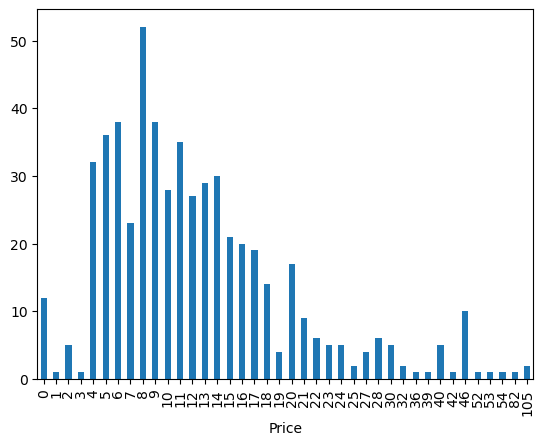

In [50]:
#precio general 
price = df.groupby('Price')['Price'].count()
price.plot(kind='bar', x='' , y='')

<p> Vemos una distribución asimetrica positiva, identificando algunos valores atipicos </p>

<p>Ahora, veamos cual es la distribución de los precios de los 10 autores más vendidos </p>

<Axes: xlabel='Price'>

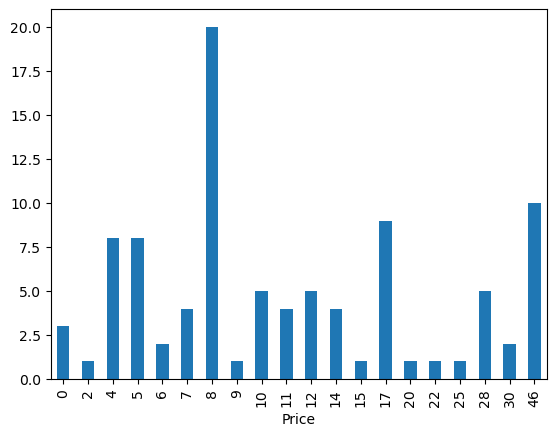

In [51]:
price_b10 = df_b10.groupby('Price')['Price'].count()
price_b10.plot(kind='bar', x='Price', y='price')

<p> En ambas graficas los libros de 8 dolares estuvieron muy por encima del resto. Curiosamente hay 10 Best Sellers que a pesar de costar 46 dolares se posicionaron muy bien.

Sin embargo, es claro que de manera general hay preferencia por los libros de menos de 20 dolares. 

Pero también sería interesante ver la distribución de precios por genero. Para este caso estimaré el promedio de los precios por año.
</p>

In [52]:
gnere_price_year = df.pivot_table(index='Year',columns='Genre', values='Price',aggfunc='mean')
gnere_price_year

Genre,Fiction,Non Fiction
Year,,
2009,15.583333,15.230769
2010,9.700000,16.000000
2011,11.619048,17.620690
2012,12.285714,17.482759
2013,10.708333,18.192308
2014,10.172414,20.809524
2015,9.352941,10.969697
2016,12.631579,13.516129
2017,8.833333,13.730769


<Axes: xlabel='Year'>

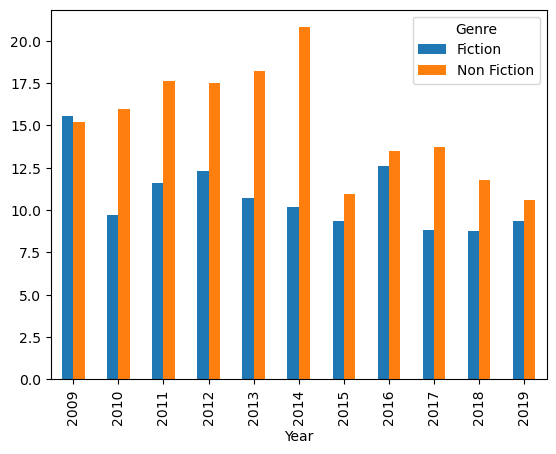

In [53]:
gnere_price_year.plot(kind='bar')

El promedio del precio de los libros de ficción se ha mantenido por debajo del precio promedio de los que no

<h2> Profit </h2>

**Hipotesis**, cada review es un lector.

<p> ¿ Si entendieramos cada review como una venta, y lo multiplicaramos por el precio de cada uno, cuales serían las ganancias por autor? Podriamos discriminar por año </p>

<p> Creo que la solución más sencilla es crear una nueva columna con el profit, calculado de la forma anterior </p>

In [54]:
#defino la nueva columna
df['Profit'] = df['Price']*df['Reviews']

<p> Quiero ver, de manera general, las ganancias por autor. Mi logica me diría que los autores más vendidos deberían ser también los que más profit obtuvieron, sin embargo ya vimos que estos no necesariamente tenían los precios altos. Dejemos que la data hable: </p>

In [55]:
profit_author = df.groupby('Author')['Profit'].sum().sort_values(ascending=False).head(25)
#mi df agrupado por autor sumando la columna profit, estos valores ordenados de manera descendente
#al hacerlo me doy cuenta que son demasiados autores (248 exactamente) así que solo voy a tomar al 10%

<Axes: xlabel='Author'>

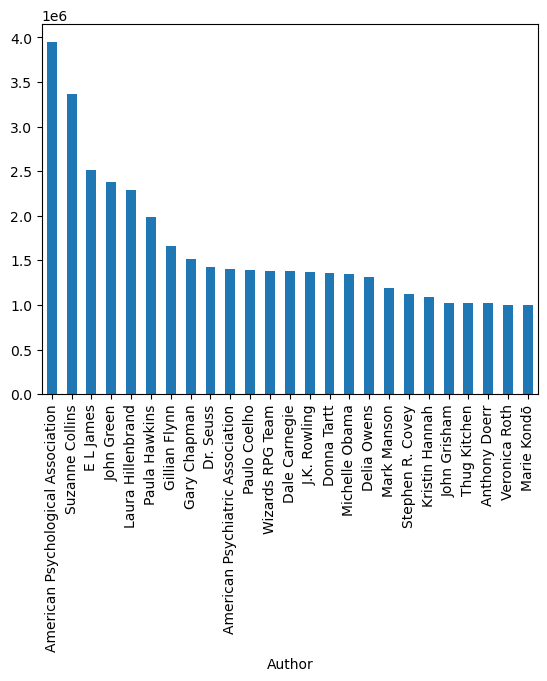

In [56]:
profit_author.plot(kind='bar', x='' , y='')

¿Que es lo que escriben estos tipos? ¿Cuanto cuestan sus libros?

In [57]:
ind_pa = profit_author.index #indices
df_profit = df[df['Author'].isin(ind_pa)] #el df filtrado de acuerdo a lista de autores con más profit
pro_gnere =df_profit.drop_duplicates(subset='Author') #quedamos con valores unicos para estimar genero
pro_gnere.groupby('Genre')['Genre'].count() #contamos genero por autor

Genre
Fiction        15
Non Fiction    10
Name: Genre, dtype: int64

<p> De esos 25 autores, 15 escriben ficción, otra vez la mayoría, y viendo la distribución de los libros que venden, la mayoría se ubican por debajo de los 20 dolares, con dos picos en los 8 y 11 dolares. </p>

<Axes: xlabel='Price'>

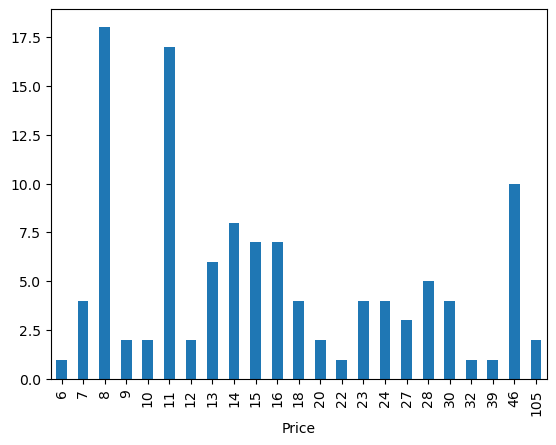

In [64]:
a = df_profit.groupby('Price')['Price'].count()
a.plot(kind='bar')

<p> Aquí nos damos cuenta que el autor que antes habiamos estimado con más BS ni siquiera aparece en los primeros 25 puestos de los que más ganaron según el criterio aplicado, sin embargo esto no es del todo concluyente pues tengo mi data sesgada, es decir, no tengo en ella la cantidad de libros vendidos por cada uno. Pero el ejercicio estuvo interesante. <p>

<h3> ¿Que hay de los lectores </h3>

Bajo la misma **hipotesis**, pensariamos que cada año los lectores van aumentado. ¿Cual es la distribución de los reviews por año? 

<Axes: xlabel='Year'>

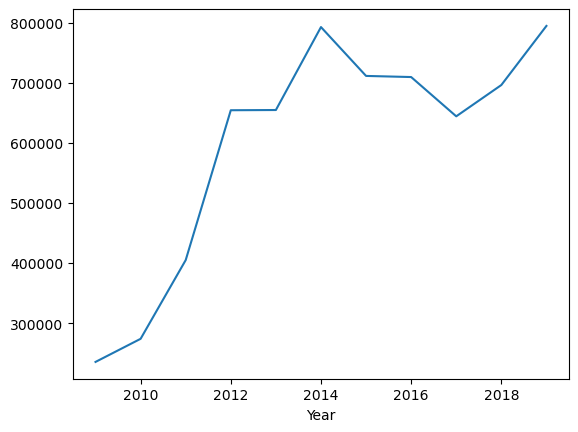

In [59]:
readers = df.groupby('Year')['Reviews'].sum()
readers.plot()

Pues si, se ve una tendencia positiva en la cantidad de lectores por año en la decada.

<h3> Entonces, cuales fueron los libros más vendidos por año </h3>

Continuando con nuestra hipotesis, entonces para saber cuales fueron los libros más vendidos por año solo debería filtrar mi data y seleccionar mis valores más altos agrupados por año. Suena sencillo, pero veamos:

In [60]:
df.loc[df.groupby('Year')['Reviews'].idxmax()]
#filtrado con metodo .loc cuyo parametro son los indices de los Reviews mas altos agrupados por año

,Name,Author,User Rating,Reviews,Price,Year,Genre,Profit
459,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.6,19720,8,2009,Fiction,157760
407,The Hunger Games,Suzanne Collins,4.7,32122,14,2010,Fiction,449708
408,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2011,Fiction,256976
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction,572710
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction,572710
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction,515439
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction,556122
399,The Handmaid's Tale,Margaret Atwood,4.3,29442,7,2017,Fiction,206094
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463


Y aquí nuevamente tenemos que en teoría los libros más vendidos fueron de ficción jaja, que estos no superan los 20 $. Bastante interesante

<h3> Conclusiones:  </h3>
<ul>
<li> De de manera general, la ficción no supera a la relidad (jaja), pues si hay preferencia por los libros de 'non fiction'. Aunque hay una distribución equitativa entre los 10 autores más vendidos. </li>
<li> Los libros de ficción han estado en todos los años por debajo de los libros de no ficción. </li>
        
<li> El precio promedio de los libros de ficción siempre ha estado por debajo del precio promedio de lo que no pertenecen a este genero. </li>

<li>Podemos pensar que el precio de los libros influye en la cantidad de lectores, pues finalmente la compra de estos es lo que los hace Best Sellers, evidenciando que los libros de menos de 20 dolares son los que mayor acogida tienen </li>
<li>
Sin embargo no necesariamente los más baratos son los que más ganancia dejan, aunque claro, no se puede asegurar dado que tengo mi data sesgada. 
</li>
<li> Vemos una tendencia positiva en la cantidad de lectores por año, bajo la hipotesis de que cada review corresponde a un lector. </li>
<li> Continuando con nuestra hipotesis, podriamos estimar cuales fueron los libros más vendidos por año, obteniendo la sorpresa de que estos corresponden en su gran mayoría a libros de ficción</li>
</ul>